# Welter issue #5
## Predict Teff vs order
### Part 2- MEASURED values in K-Band

Michael Gully-Santiago  
Monday, December 14, 2015  

Let's try it.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

In [3]:
import h5py

In [4]:
import pandas as pd

In [5]:
names = ['wl_start', 'wl_end', 'band', 'number', 'tell_trans', 'm_val','wl_center']
orders = pd.read_csv('../data/analysis/IGRINS_LkCa4_run01_last20kMCMC.csv', usecols=names)

In [6]:
orders.head()

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center
0,18092,18346,H,0,0.117487,98,18219.0
1,17914,18165,H,1,0.342583,99,18039.5
2,17739,17988,H,2,0.666035,100,17863.5
3,17568,17815,H,3,0.827089,101,17691.5
4,17400,17645,H,4,0.904758,102,17522.5


## Actual data

You can have pandas read the clipboard if you copy the output from the terminal.  Saves a step of copying files over, at the expense of reproducibility...

```python
sf_dat = pd.read_clipboard(names=dat_names, sep=r',\s+', squeeze=True)

sf_dat.to_csv('../data/analysis/run02_by_order.csv', index=False)
```

In [7]:
dat_names = ['m_val', 
              'Teff_05p', 'Teff_50p', 'Teff_95p',
              'logg_05p', 'logg_50p', 'logg_95p',
              'FeH_05p', 'FeH_50p', 'FeH_95p',
              'vz_05p', 'vz_50p', 'vz_95p',
              'vi_05p', 'vi_50p', 'vi_95p',
              'logO_05p', 'logO_50p', 'logO_95p',
              'c1_05p', 'c1_50p', 'c1_95p',
              'c2_05p', 'c2_50p', 'c2_95p',
              'c3_05p', 'c3_50p', 'c3_95p',
              'SA_05p', 'SA_50p', 'SA_95p',
              'LA_05p', 'LA_50p', 'LA_95p',
              'll_05p', 'll_50p', 'll_95p']

In [8]:
#sf_dat = pd.read_clipboard(names=dat_names, sep=r',\s+', squeeze=True)
#sf_dat.to_csv('../data/analysis/run02_by_order.csv', index=False)

In [9]:
sf_dat = pd.read_csv('../data/analysis/run02_by_order.csv')

In [10]:
sf_dat.head()

,m_val,Teff_05p,Teff_50p,Teff_95p,logg_05p,logg_50p,logg_95p,FeH_05p,FeH_50p,FeH_95p,...,c3_95p,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p
0,76,3267.454590,3321.355713,3375.990283,3.839400,3.940210,3.995746,0.258460,0.355955,0.448336,...,-0.001610,0.448084,0.497386,0.546584,-1.921379,-1.882995,-1.839328,11.082172,13.132164,15.462376
1,77,3223.704028,3273.089600,3325.511987,3.517674,3.643798,3.747722,0.062483,0.183201,0.261339,...,0.005078,0.377703,0.419285,0.464292,-1.973567,-1.939213,-1.899070,8.666006,9.903464,11.437382
2,78,3154.067236,3197.669678,3241.475171,3.505857,3.614406,3.667177,0.228500,0.283006,0.358953,...,0.001726,0.418747,0.467459,0.519670,-2.063626,-2.029449,-1.994681,7.337009,8.482426,9.948759
3,79,3376.852026,3437.664551,3516.882568,3.899011,3.968657,3.998132,0.456086,0.491199,0.499536,...,0.004668,0.300282,0.342518,0.387200,-1.971267,-1.940168,-1.905127,7.494379,8.506512,9.784328
4,80,3033.103174,3157.406738,3290.027441,3.769603,3.931592,3.995110,-0.490838,-0.313263,-0.176543,...,0.005586,0.336026,0.386265,0.444508,-1.971059,-1.932571,-1.891348,10.367449,12.253021,15.216815


In [11]:
merged = pd.merge(orders, sf_dat, on='m_val', how='outer')

merged.head()

,wl_start,wl_end,band,number,tell_trans,m_val,wl_center,Teff_05p,Teff_50p,Teff_95p,...,c3_95p,SA_05p,SA_50p,SA_95p,LA_05p,LA_50p,LA_95p,ll_05p,ll_50p,ll_95p
0,18092,18346,H,0,0.117487,98,18219.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17914,18165,H,1,0.342583,99,18039.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17739,17988,H,2,0.666035,100,17863.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17568,17815,H,3,0.827089,101,17691.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17400,17645,H,4,0.904758,102,17522.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot of $T_{eff}$ vs. spectral order

In [12]:
N_orders = len(orders.wl_start)

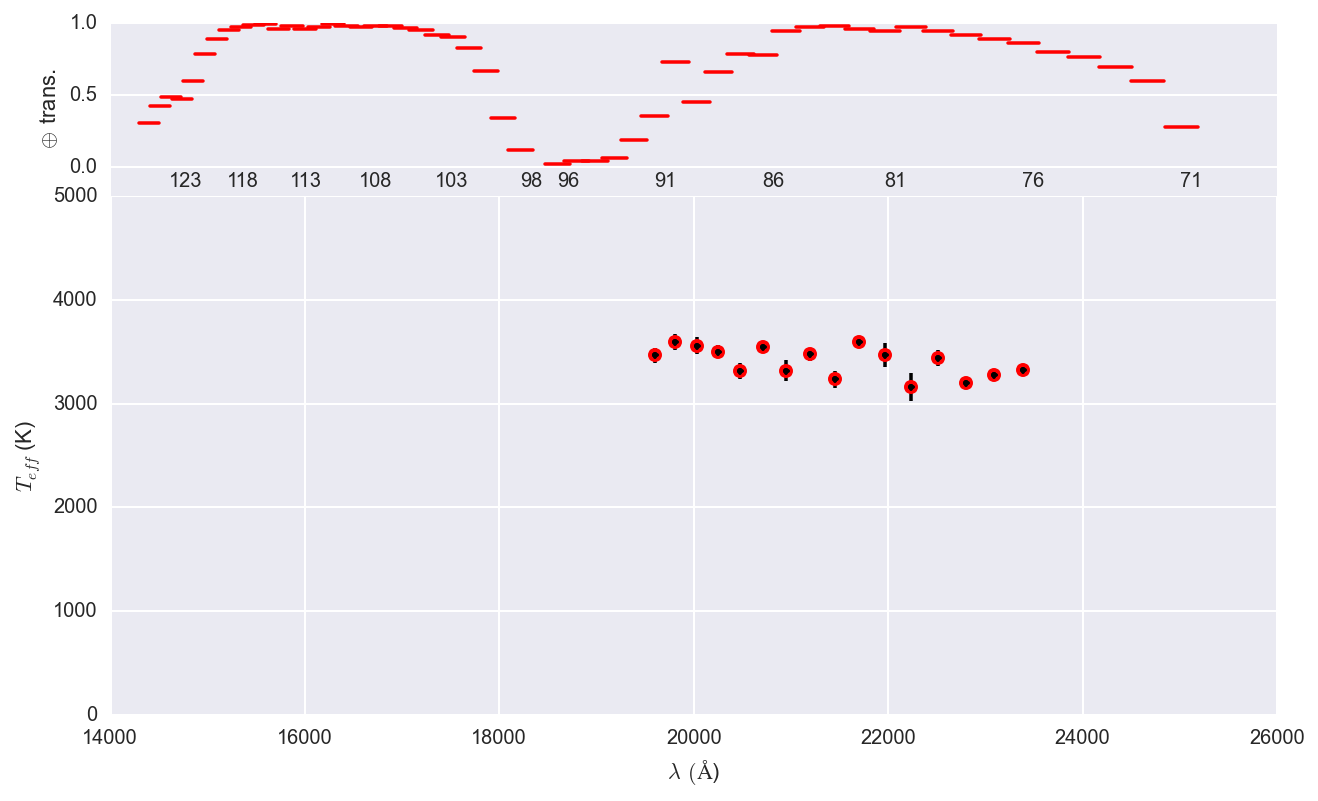

In [13]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))
    
    
ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

ax.plot(merged.wl_center, merged.Teff_50p, 'ro')
yerr = merged.Teff_95p - merged.Teff_50p
ax.errorbar(merged.wl_center, merged.Teff_50p, yerr=yerr, fmt='k.')


ax.set_ylim(0, 5000)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$T_{eff}$ (K)')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/teff_vs_order.pdf', bbox_inches='tight')

## Plot of $\log{g}$ vs. spectral order

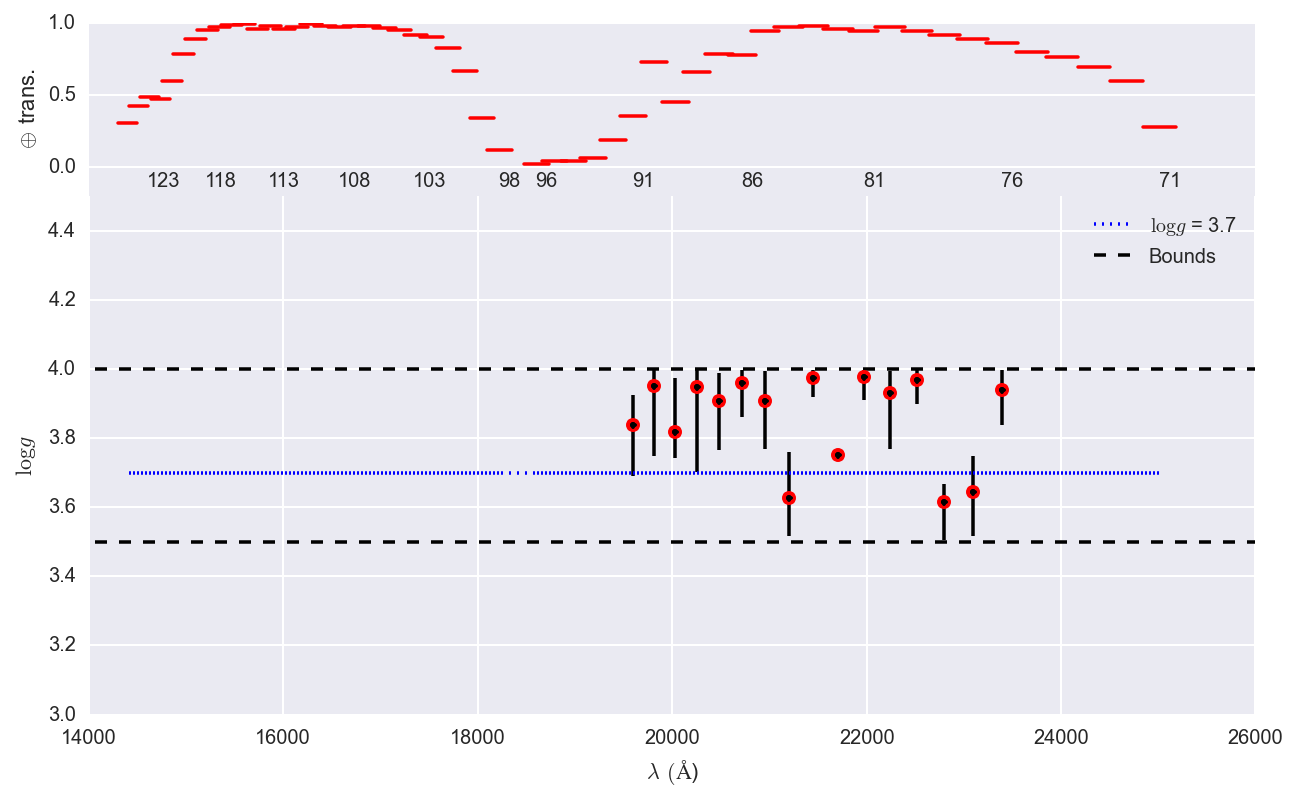

In [14]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
#text_pos = 500.0 + 20.0*np.arange(N_orders)    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

log_g_mean = 3.7
lglabel = "$\log{g}$" +" = {} ".format(log_g_mean)
ax.plot(orders.wl_center, [3.7]*len(orders.wl_center), 'b:', label=lglabel)

ax.plot([10000, 30000], [3.5]*2, 'k--', label='Bounds')
ax.plot([10000, 30000], [4.0]*2, 'k--')

ax.plot(merged.wl_center, merged.logg_50p, 'ro')
yerr1 = merged.logg_50p - merged.logg_05p
yerr2 = merged.logg_95p - merged.logg_50p
ax.errorbar(merged.wl_center, merged.logg_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(3.0, 4.5)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$\log{g}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

## Plot of $[\mathrm{Fe}/\mathrm{H}]$ vs. spectral order

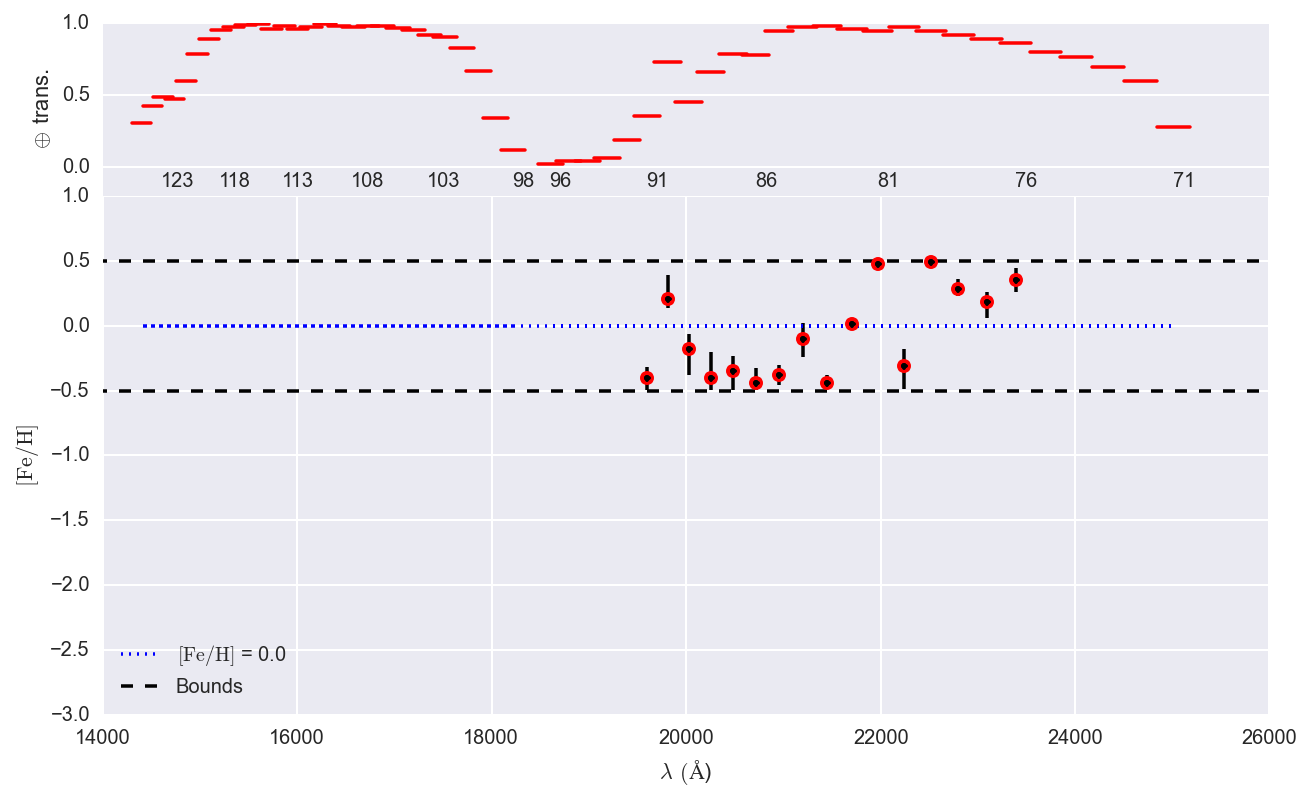

In [15]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

feh_mean = 0.0
fehlabel = "$[\mathrm{Fe}/\mathrm{H}]$" +" = {} ".format(feh_mean)
ax.plot(orders.wl_center, [feh_mean]*len(orders.wl_center), 'b:', label=fehlabel)

ax.plot([10000, 30000], [-0.5]*2, 'k--', label='Bounds')
ax.plot([10000, 30000], [0.5]*2, 'k--')

ax.plot(merged.wl_center, merged.FeH_50p, 'ro')
yerr1 = merged.FeH_50p - merged.FeH_05p
yerr2 = merged.FeH_95p - merged.FeH_50p
ax.errorbar(merged.wl_center, merged.FeH_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-3.0, 1.0)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$[\mathrm{Fe}/\mathrm{H}]$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

## Plot of $RV$ vs. spectral order

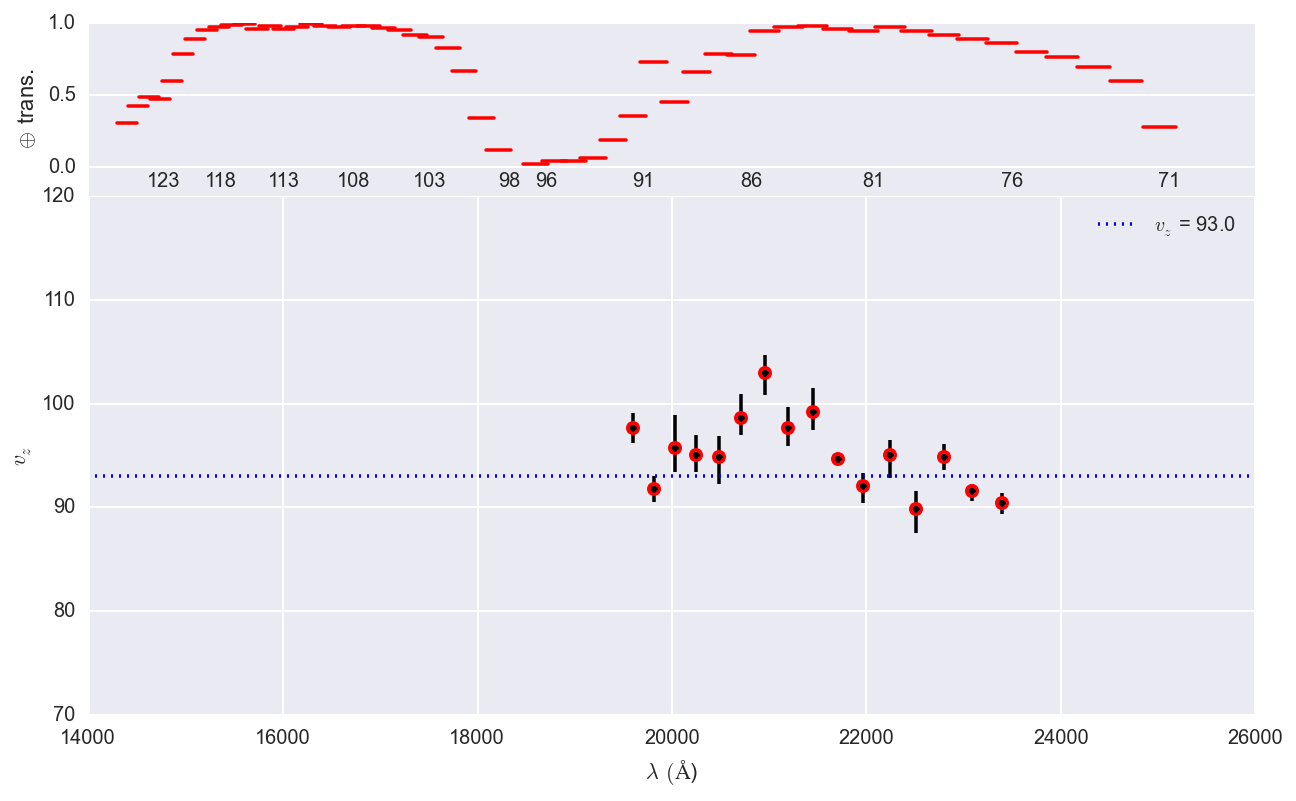

In [16]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 93.0
thislabel = "$v_z$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=thislabel)


ax.plot(merged.wl_center, merged.vz_50p, 'ro')
yerr1 = merged.vz_50p - merged.vz_05p
yerr2 = merged.vz_95p - merged.vz_50p
ax.errorbar(merged.wl_center, merged.vz_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(70, 120)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$v_z$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

Vsini

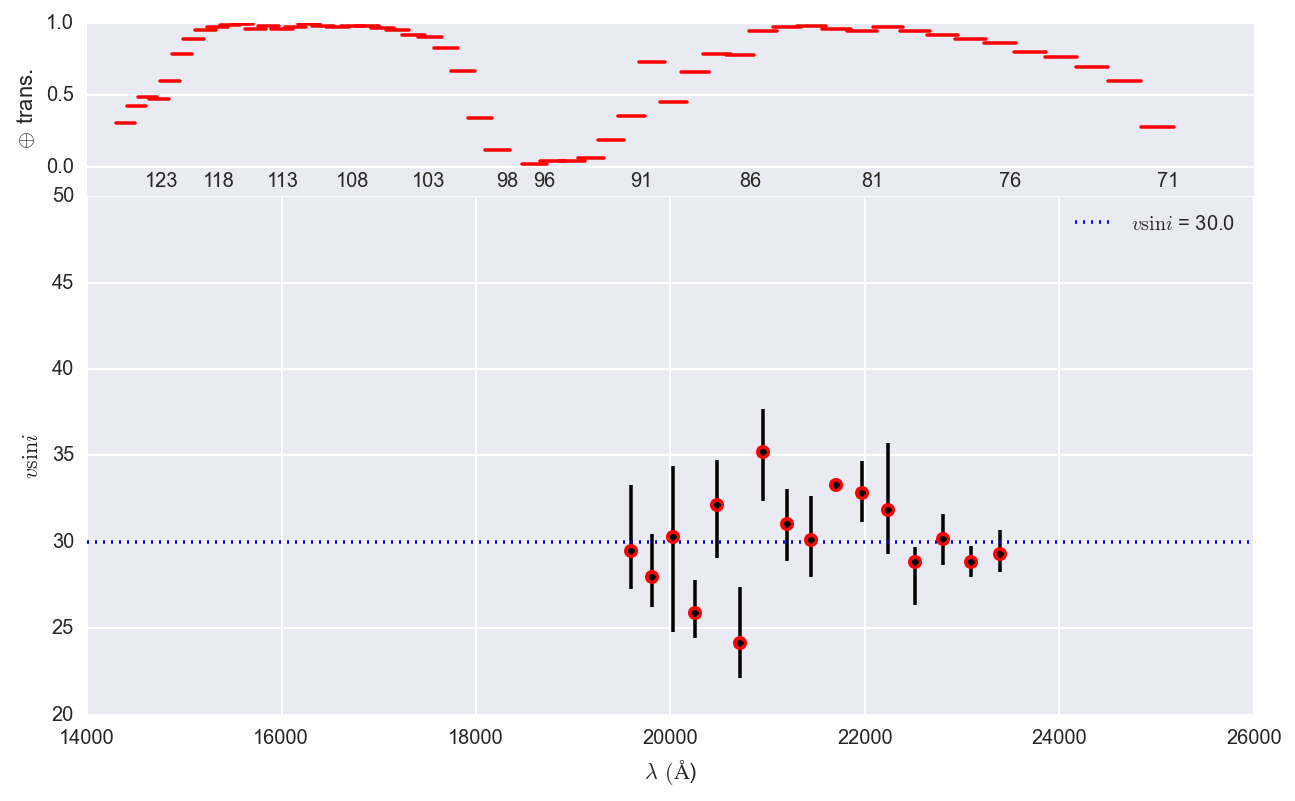

In [17]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
#ax1.fill_between(tell.wls, tell.trans, y2=1.0, alpha=0.5)
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 30.0
thislabel = "$v\sin{i}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=thislabel)


ax.plot(merged.wl_center, merged.vi_50p, 'ro')
yerr1 = merged.vi_50p - merged.vi_05p
yerr2 = merged.vi_95p - merged.vi_50p
ax.errorbar(merged.wl_center, merged.vi_50p, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(20, 50)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$v \sin{i}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

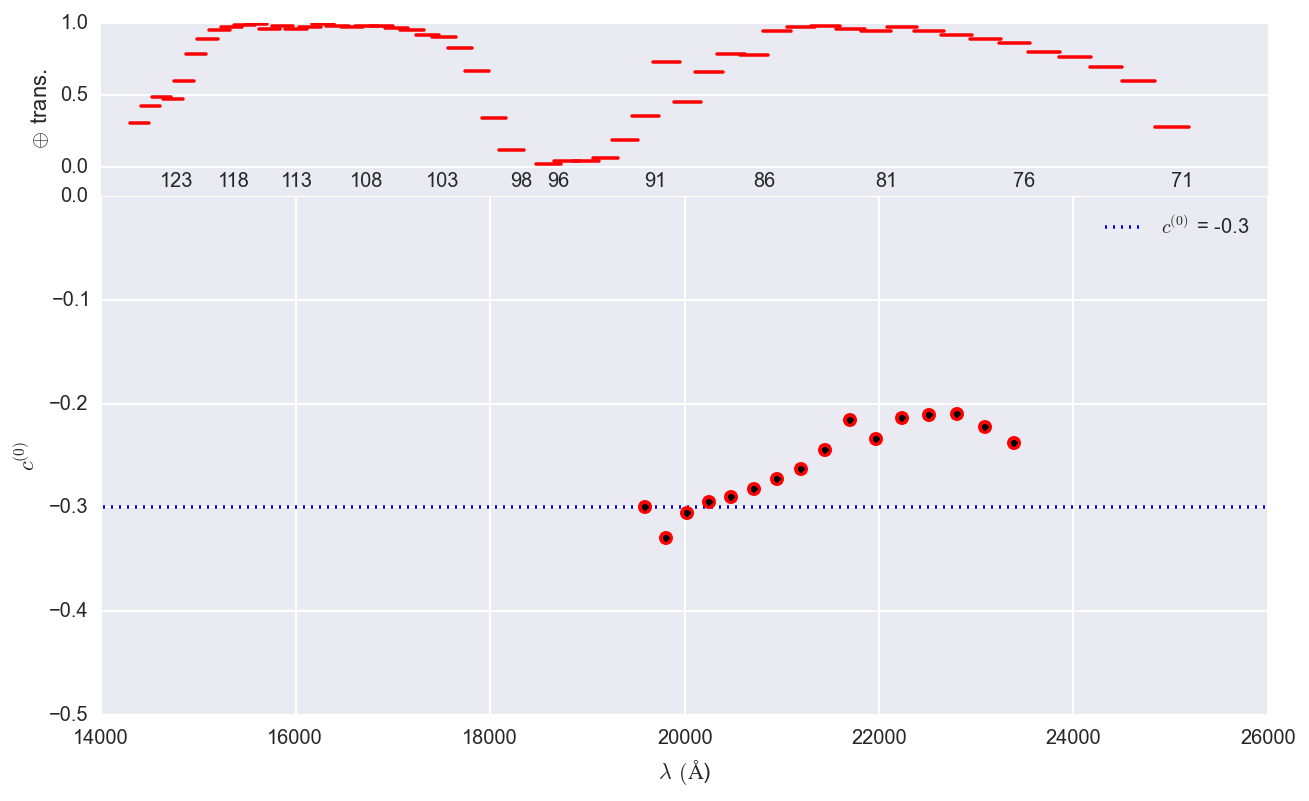

In [18]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -0.3
this_label = "$c^{(0)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.logO_50p
y05 = merged.logO_05p
y95 = merged.logO_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.5, 0.0)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$c^{(0)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

# Order-by-order calibration parameters

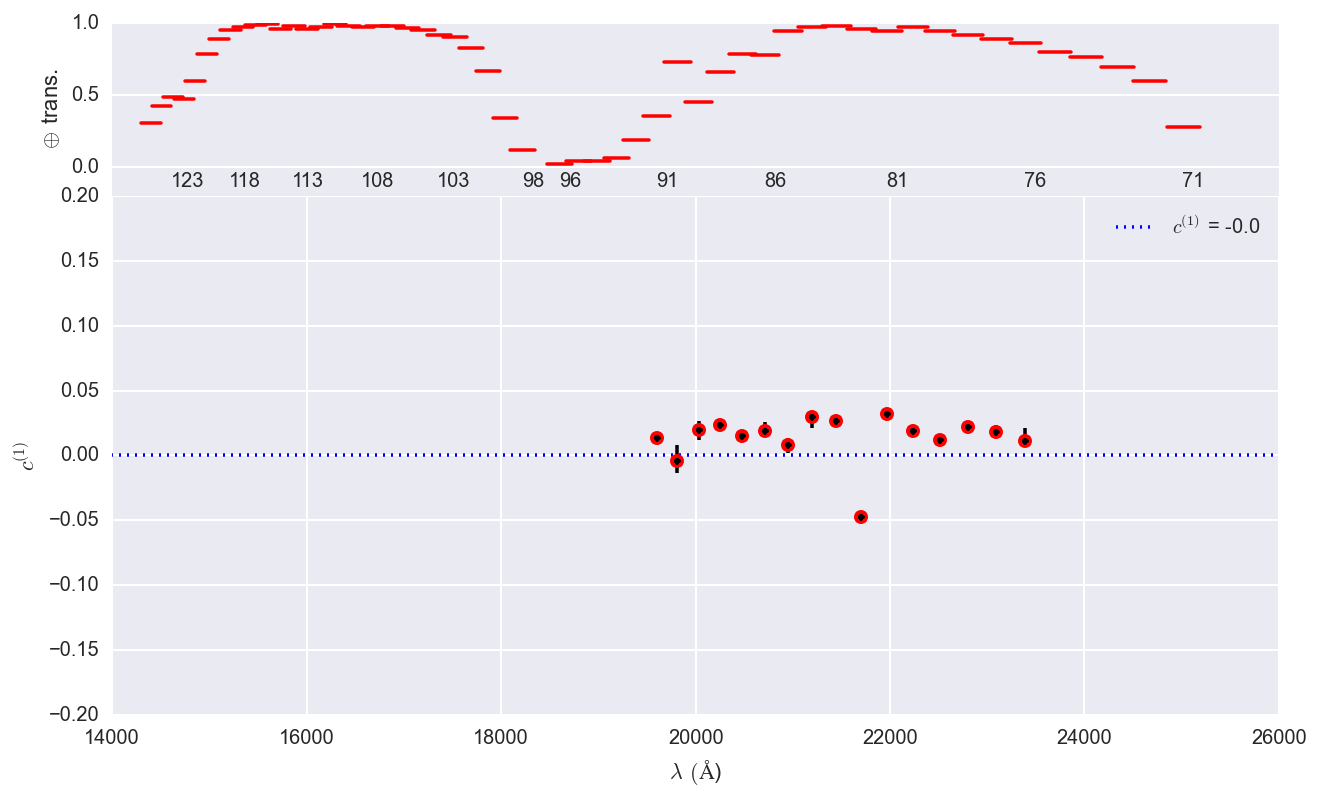

In [19]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -0.0
this_label = "$c^{(1)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c1_50p
y05 = merged.c1_05p
y95 = merged.c1_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.2, 0.2)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$c^{(1)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

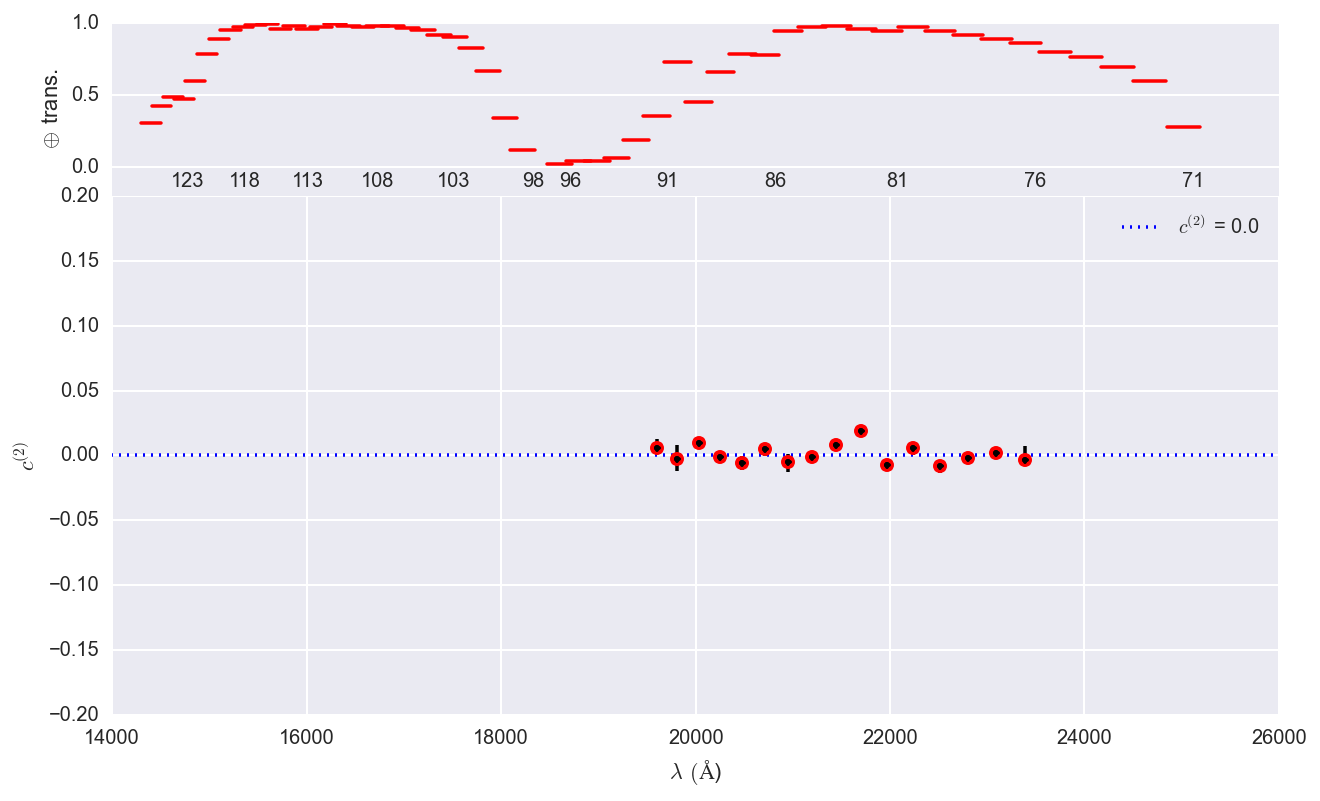

In [20]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.0
this_label = "$c^{(2)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c2_50p
y05 = merged.c2_05p
y95 = merged.c2_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.2, 0.2)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$c^{(2)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

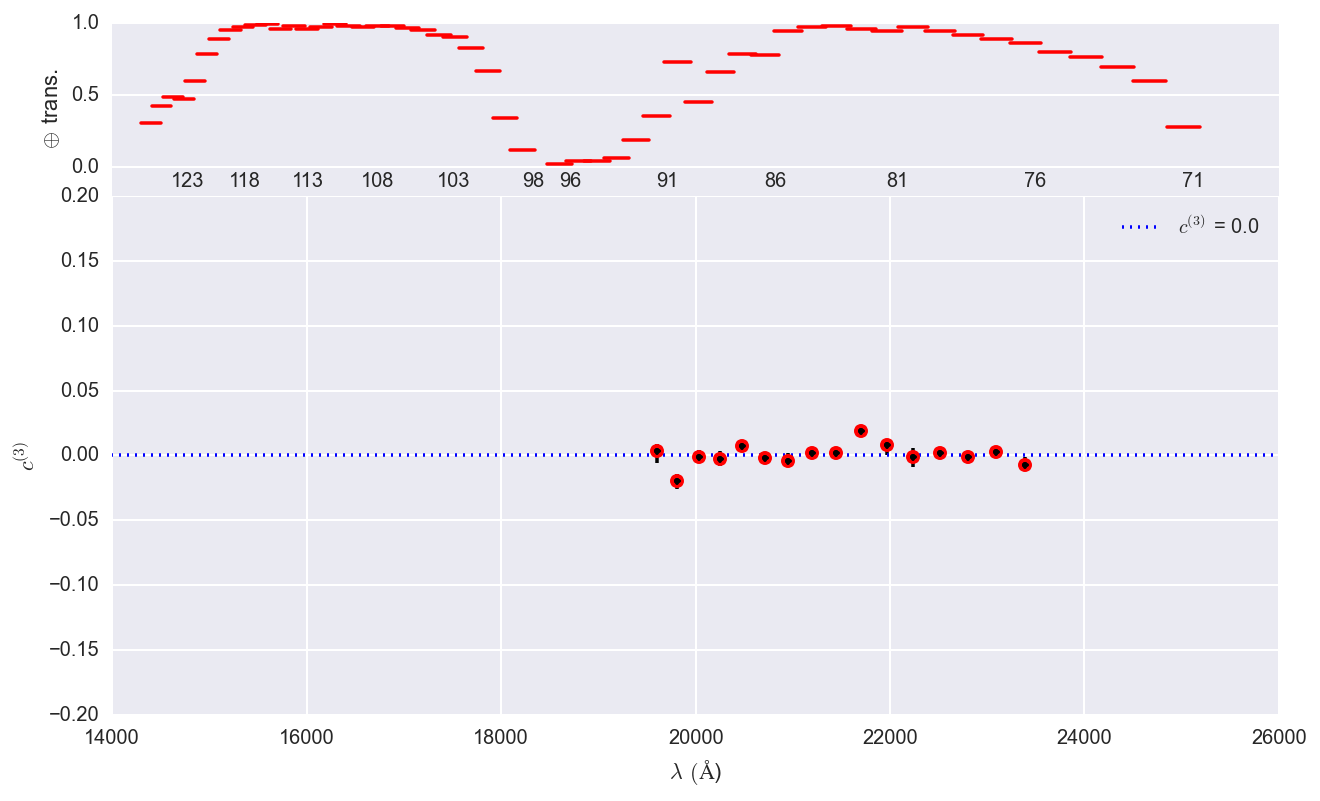

In [21]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.0
this_label = "$c^{(3)}$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.c3_50p
y05 = merged.c3_05p
y95 = merged.c3_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-0.2, 0.2)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$c^{(3)}}$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

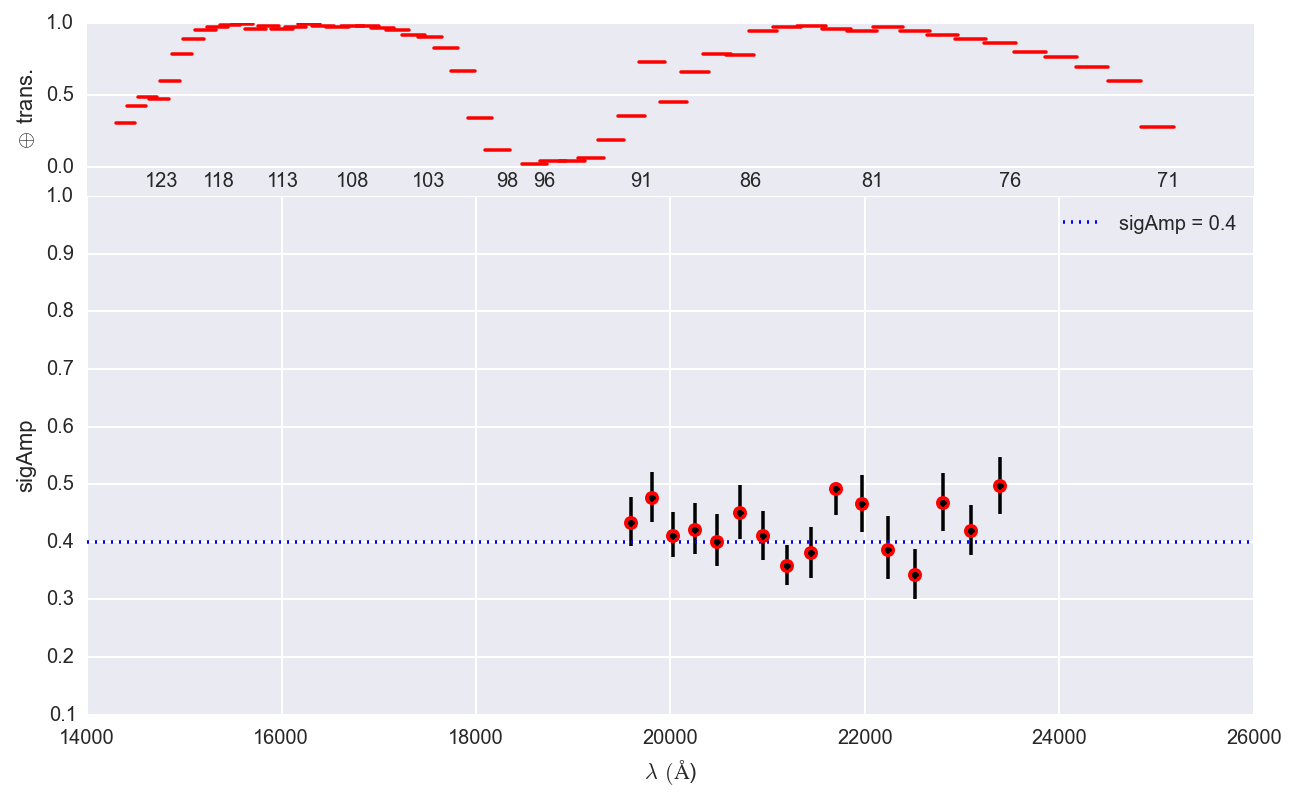

In [22]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 0.4
this_label = "sigAmp" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.SA_50p
y05 = merged.SA_05p
y95 = merged.SA_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(0.1, 1.0)
ax.set_xlim(14000, 26000)
ax.set_ylabel('sigAmp')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

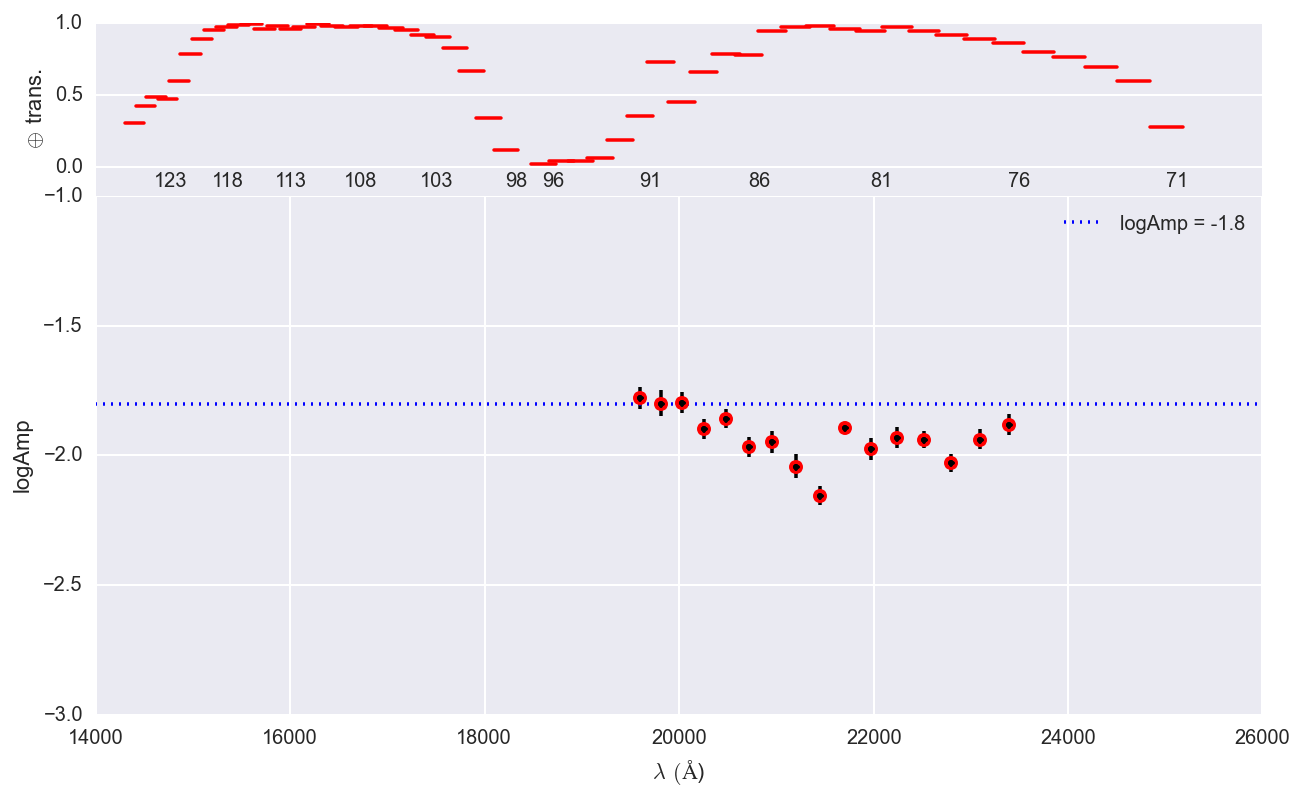

In [23]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = -1.8
this_label = "logAmp" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.LA_50p
y05 = merged.LA_05p
y95 = merged.LA_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(-3, -1.0)
ax.set_xlim(14000, 26000)
ax.set_ylabel('logAmp')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

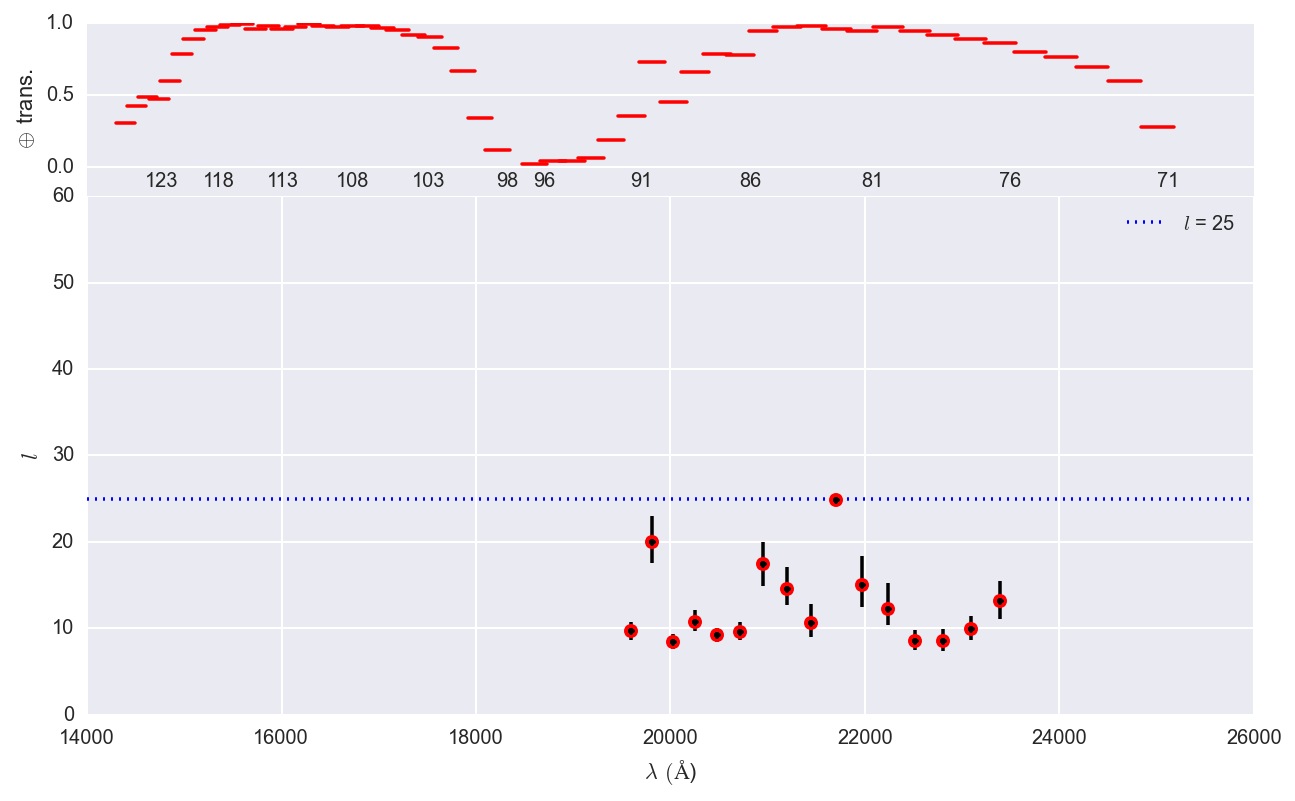

In [24]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_axes([0.35, 0.7, 0.45, 0.2],xticks=[], yticks=[0.0, 0.5, 1])
ax1.set_xlim(14000, 26000)
ax1.set_ylim(-0.2, 1)
ax1.set_ylabel('$\oplus$ trans.')
for i in range(N_orders):
    x = [orders.wl_start[i], orders.wl_end[i]]
    y = [orders.tell_trans[i]]*2
    ax1.plot(x, y, 'r-')
    
for i in range(N_orders):
    if (orders.number.values[i] % 5) == 0:
        ax1.text(orders.wl_center[i], -0.13, '{}'.format(orders.m_val.values[i]))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.6])

this_mean = 25
this_label = "$l$" +" = {} ".format(this_mean)
ax.plot([10000, 30000], [this_mean]*2, 'b:', label=this_label)

x = merged.wl_center
y = merged.ll_50p
y05 = merged.ll_05p
y95 = merged.ll_95p
ax.plot(x, y, 'ro')
yerr1 = y - y05
yerr2 = y95 - y
ax.errorbar(x, y, yerr=[yerr1, yerr2], fmt='k.')


ax.set_ylim(0, 60)
ax.set_xlim(14000, 26000)
ax.set_ylabel('$l$')
ax.set_xlabel('$\lambda \,(\AA $)')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

Par-par plot

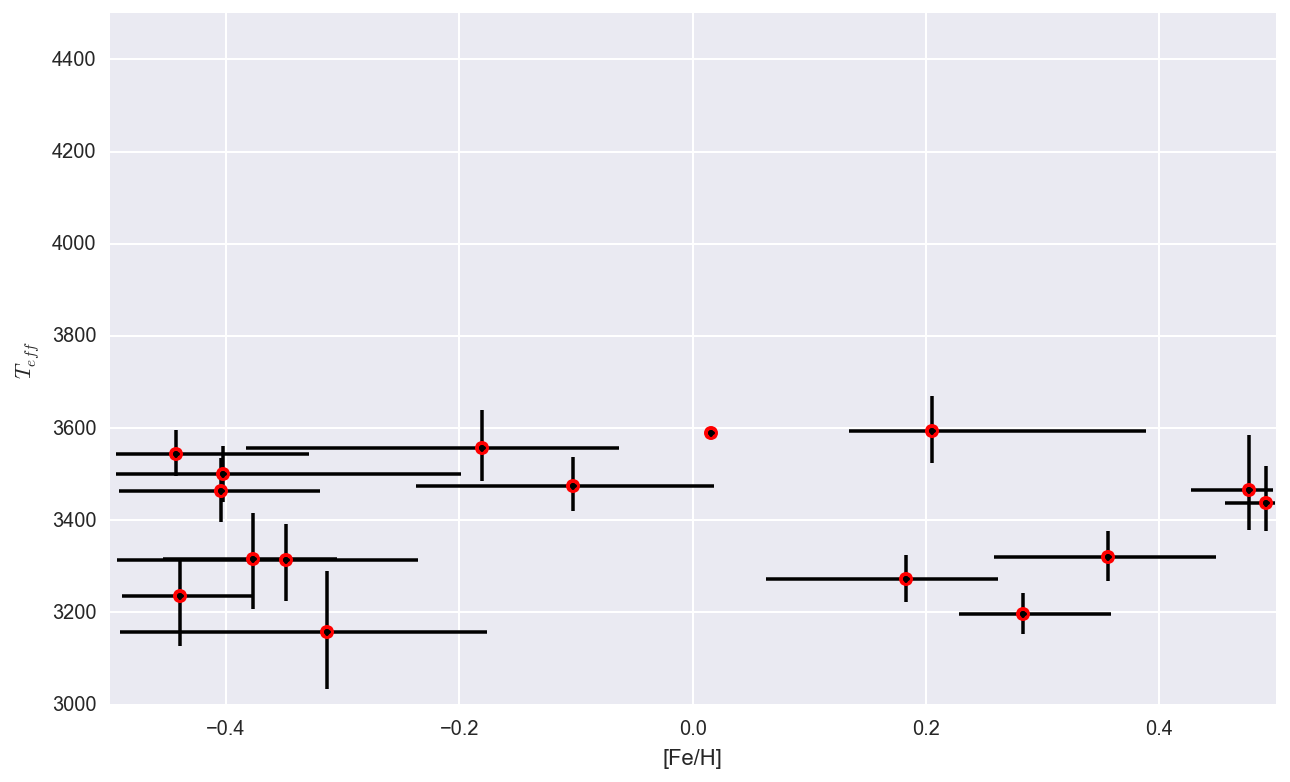

In [25]:

#plt.subplot(211)
fig = plt.figure(figsize=(18, 6))

ax = fig.add_axes([0.35, 0.1, 0.45, 0.8])




ax.plot(merged.FeH_50p, merged.Teff_50p, 'ro')
yerr1 = merged.Teff_50p - merged.Teff_05p
yerr2 = merged.Teff_95p - merged.Teff_50p
xerr1 = merged.FeH_50p - merged.FeH_05p
xerr2 = merged.FeH_95p - merged.FeH_50p
ax.errorbar(merged.FeH_50p, merged.Teff_50p, yerr=[yerr1, yerr2], xerr=[xerr1, xerr2], fmt='k.')


ax.set_xlim(-0.5, 0.5)
ax.set_ylim(3000, 4500)
ax.set_ylabel('$T_{eff}$')
ax.set_xlabel('[Fe/H]')
ax.legend(loc='best')

#plt.savefig('../document/figures/logg_vs_order.pdf', bbox_inches='tight')

# Save the merged DataFrame

In [26]:
merged.to_csv('../data/analysis/IGRINS_LkCa4_run02_last20kMCMC.csv', index=False)

The end for now.  